In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv", index_col= "Date")
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [8]:
opsd_daily.shape

(4383, 5)

In [7]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [13]:
# Adding more data and time information
opsd_daily = pd.read_csv("opsd_germany_daily.csv", index_col= "Date", parse_dates= True)

# Adding col// show col
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday Name"] = opsd_daily.index.day_name()

opsd_daily.sample(5, random_state= 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [14]:
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [16]:
opsd_daily.loc["2012-02"].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


<Axes: xlabel='Date'>

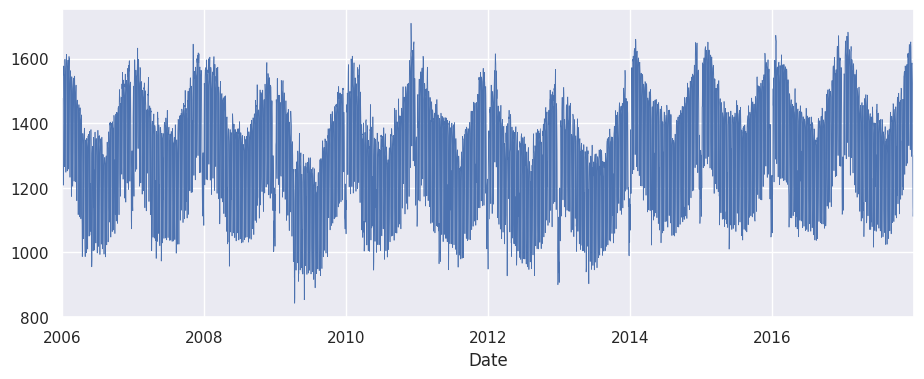

In [23]:
sns.set(rc= {"figure.figsize":(11, 4)})
opsd_daily["Consumption"].plot(linewidth= 0.5)

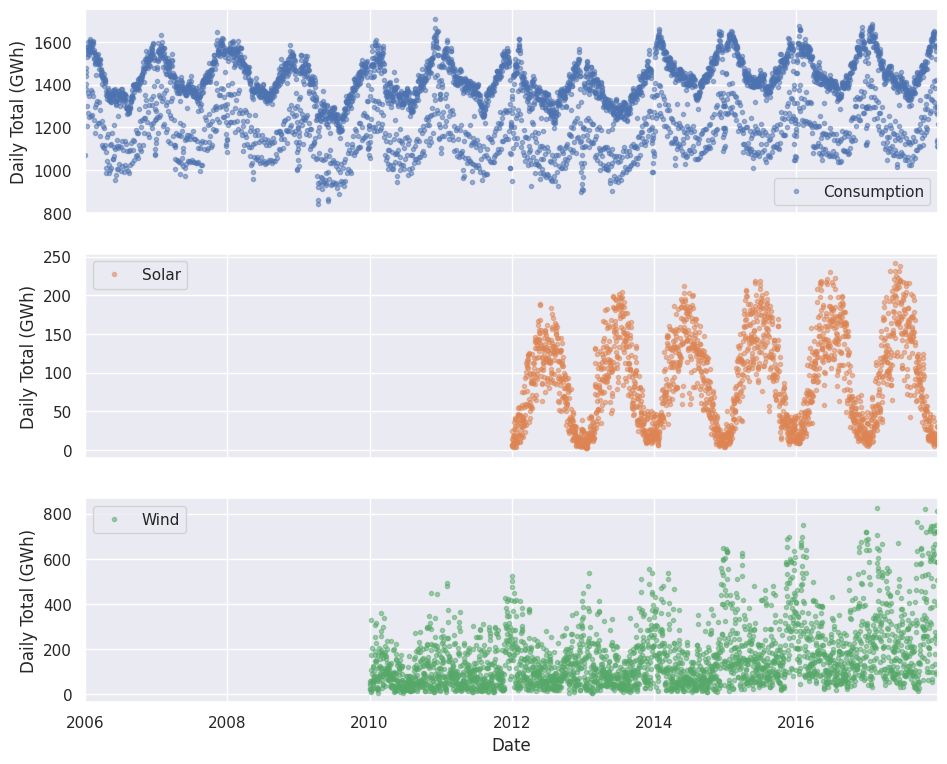

In [26]:
cols_plot= ["Consumption", "Solar", "Wind"]
axes = opsd_daily[cols_plot].plot(marker= ".", alpha= 0.5, linestyle= "None", figsize= (11, 9), subplots= True)

for ax in axes:
    ax.set_ylabel("Daily Total (GWh)")
plt.show()

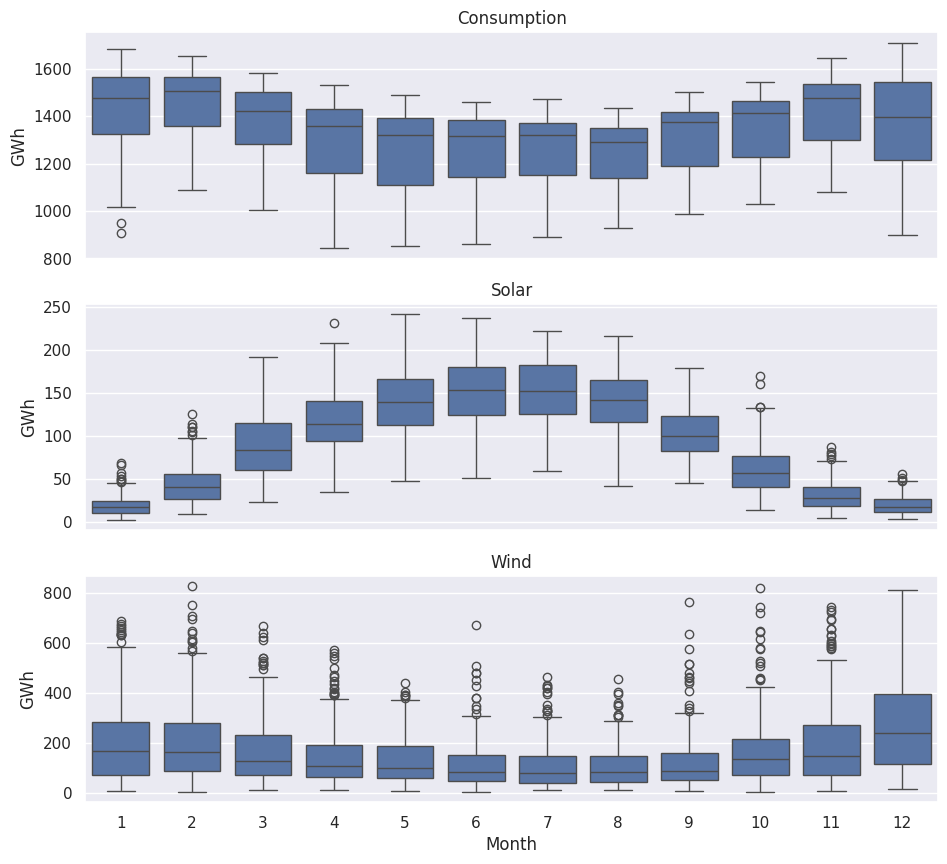

In [29]:
# Seasonality
fig, axes = plt.subplots(3, 1, figsize= (11, 10), sharex= True)
for name, ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data= opsd_daily, x= "Month", y= name, ax= ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)
    
    # if ax != axes[-1]:
    #     ax.set_xlabel("")

In [40]:
pd.date_range("1998-03-10", "1998-03-15", freq= "D")


DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [41]:
times_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])

In [42]:
consum_sample = opsd_daily.loc[times_sample, ["Consumption"]].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [46]:
consum_freq = consum_sample.asfreq("D")
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [45]:
consum_freq["Consumption - Forward Fill"]  = consum_sample.asfreq("D", method= "ffill")
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [49]:
data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]

opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [50]:
print(opsd_daily.shape)
print(opsd_weekly_mean.shape)

(4383, 7)
(627, 4)


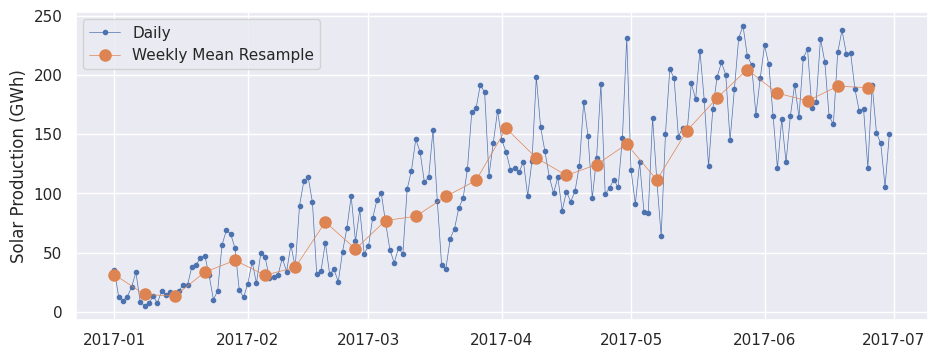

In [54]:
# Visualize daily and weekly time series of solar in June
start, end = "2017-01", "2017-06"

fix, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, "Solar"],
        marker= ".", linestyle= "-", linewidth= 0.5, label= "Daily")
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"],
        marker= "o", markersize= 8, linestyle= "-", linewidth= 0.5, label= "Weekly Mean Resample")
ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

In [73]:
opsd_annual = opsd_daily[data_columns].resample("YE").sum(min_count= 360)
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name= "Year"

opsd_annual["Wind+Solar/Consumption"] = opsd_annual["Wind+Solar"] / opsd_annual["Consumption"]
opsd_annual.tail()

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

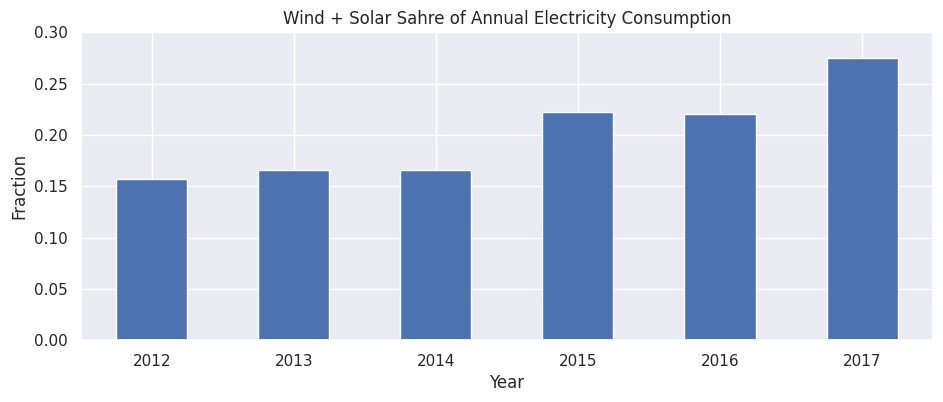

In [77]:
ax = opsd_annual.loc[2012 : , "Wind+Solar/Consumption"].plot.bar(color= "C0")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 0.3)
ax.set_title("Wind + Solar Sahre of Annual Electricity Consumption")
plt.xticks(rotation= 0)

In [78]:
opsd_7d = opsd_daily[data_columns].rolling(7, center= True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


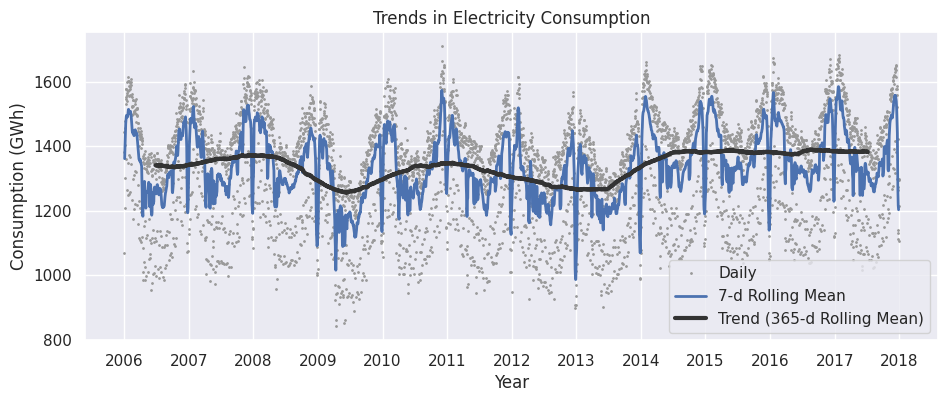

In [80]:
import matplotlib.dates as mdates

opsd_365d = opsd_daily[data_columns].rolling(window= 365, center= True, min_periods= 360).mean()

fig,ax = plt.subplots()
ax.plot(opsd_daily["Consumption"], marker= ".", markersize= 2, color= "0.6", linestyle= "None", label= "Daily")
ax.plot(opsd_7d["Consumption"], linewidth= 2, label= "7-d Rolling Mean")
ax.plot(opsd_365d["Consumption"], color= "0.2", linewidth= 3, label= "Trend (365-d Rolling Mean)")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trends in Electricity Consumption")
plt.show()

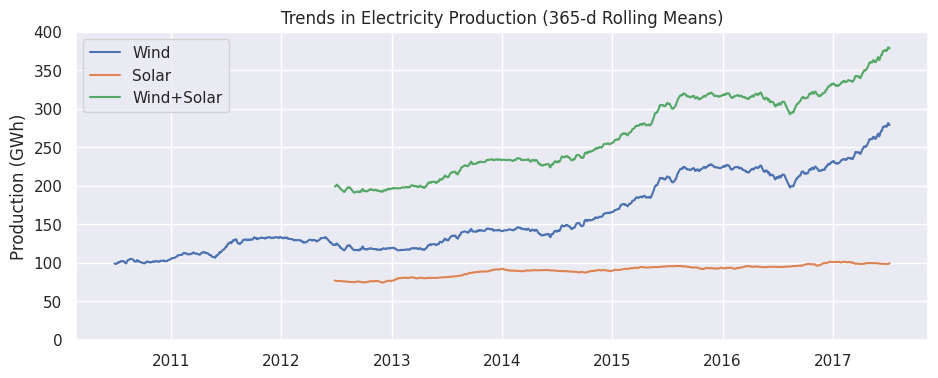

In [81]:
fig, ax = plt.subplots()
for nm in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(opsd_365d[nm], label= nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel("Production (GWh)")
    ax.set_title("Trends in Electricity Production (365-d Rolling Means)")
    
plt.show()